In [23]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression


In [24]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = (Q3 - Q1)
 upper_range = Q3 + (3 * IQR)
 return upper_range


In [25]:
def plotter(x_inliers, y_inliers, outliers_x, outliers_y, old_x, y_pred):
    plt.figure(figsize=(10, 5))
    plt.scatter(x_inliers, y_inliers, s = 3,color='blue')
    plt.scatter(outliers_x, outliers_y, s = 3,color='red')
    plt.title('1 dimensional data: input is x and output is y')
    plt.scatter(old_x, y_pred, s = 3, color='green')
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    return plt.show()


In [26]:
def removing_outlier(x, y, indexes):
    outliers_x = []
    outliers_y = []
    old_x = x
    for i in indexes:
        outliers_x.append(x[i]) 
        outliers_y.append(y[i])
        x = np.delete(x,i)
        y = np.delete(y,i)
    return x, y, outliers_x, outliers_y, old_x


In [27]:
def fitting_predicting(x, y):
    # fitting and predicting using inliers data
    lin_regressor = LinearRegression()
    x_input = x[:,np.newaxis]
    lin_regressor.fit(x_input, y)

    # predicting 
    y_pred = lin_regressor.predict(x_input)
    return y_pred


In [28]:
# reading data from data.csv
data = pd.read_csv("data.csv")

# spliting data x and y
x = data.iloc[:,0].values
y = data.iloc[:,1].values


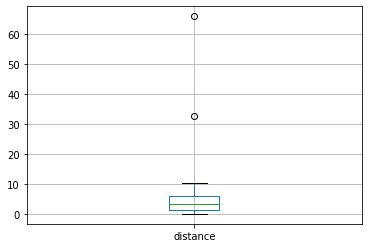

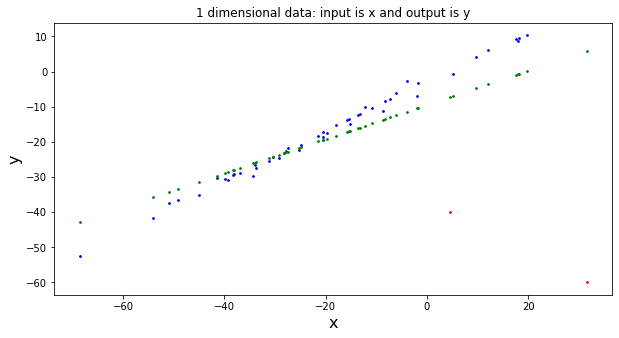

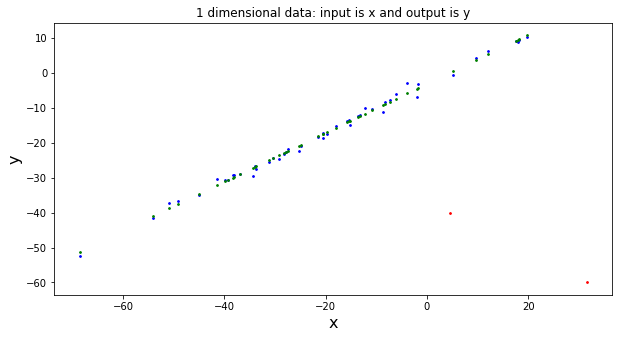

In [30]:
flag = True
while(flag):
    # fitting data using linear regression
    y_pred = fitting_predicting(x, y)

    # finding distance between predicting data and given data 
    distance = pd.DataFrame({'distance' :((y_pred - y) ** 2) ** 0.5})

    # plotting Tukey Box
    distance.boxplot(return_type = "dict")
    plt.plot()
    # checking there is any index for outliers
    if len(indexes[0] < 1 ):
        flag = False
    
    # finding indexes all outliers
    indexes = np.where(distance.distance > outlier_treatment(distance))
    
    # removing outliers
    inliers_x, inliers_y, outliers_x, outliers_y, old_x  =removing_outlier(x, y, indexes)

    # plotting first predicting y, x, outliers datas and inliers datas
    plotter(inliers_x, inliers_y, outliers_x, outliers_y, old_x, y_pred )
    
    # fitting and predicting using inliers data
    y_pred = fitting_predicting(inliers_x, inliers_y)

    # ploting inliers outliers and predicting with using inliers data
    plotter(inliers_x, inliers_y, outliers_x, outliers_y, inliers_x, y_pred)
    